### PAPR for 16-PAM

In [4]:
M = 16
power_vec = [(2i - M - 1)^2 for i ∈ 1:M]
power_sum = sum(power_vec)
avg_power = power_sum/M
max_power = (M - 1)^2

papr_pam_16 = max_power/avg_power
# println("Power sum: ", power_sum)
println("PAPR: ", papr_pam_16)

PAPR: 2.6470588235294117


### d_min for 16-PAM

In [5]:
Eg = 1/avg_power
d_min_pam_16 = sqrt(Eg)*2

0.21693045781865616

### PAPR for 16-PSK

In PSK (Phase Shift Keying), the peak power refers to the maximum power that the signal will reach at any given point in time. PSK is a constant-envelope modulation scheme, which means that the amplitude of the signal remains constant for all symbols. Because the signal's power is proportional to the square of its amplitude and the amplitude is constant, the power of a PSK signal remains constant at all times.

Therefore, the peak power $(P_{\text{peak}})$ in PSK is the same as the average power $(P_{\text{avg}})$, which is the power level of the signal:

\begin{equation}
    P_{\text{peak}} = P_{\text{avg}}
\end{equation}

To put it mathematically, for PSK:

$$
\text{PAPR} = \frac{\text{Peak Power}}{\text{Average Power}}
$$

And since for PSK:

$$
\text{Peak Power} = \text{Average Power}
$$

It follows that:

$$
\text{PAPR} = \frac{\text{Average Power}}{\text{Average Power}} = 1
$$

Or in logarithmic scale (decibels, dB):

$$
\text{PAPR (dB)} = 10 \cdot \log_{10}(1) = 0 \text{ dB}
$$


### d_min for 16-PSK 
result does not agree with figure 2 [R1]

In [6]:
papr_psk_16 = 1.0
calculate_dmin(M, radius) = 2 * radius * sin(π / M)

M = 16
radius = 1.0 # Radius of the constellation circle normalized on average energy
d_min_psk_16 = calculate_dmin(M, radius)

println("The minimum Euclidean distance (d_min) for $M-PSK with a radius of $radius is $d_min_psk_16")


The minimum Euclidean distance (d_min) for 16-PSK with a radius of 1.0 is 0.3901806440322565


### PAPR for 16-QAM

In [7]:
M = 16
m = Int64(sqrt(M))
power_vec = [(2i - m - 1)^2 + (2j - m - 1)^2 for i ∈ 1:m, j ∈ 1:m]
power_sum = sum(power_vec)
avg_power = power_sum/M
max_power = maximum(power_vec)

papr_qam_16 = max_power/avg_power
println("PAPR: ", papr_qam_16)

PAPR: 1.8


### d_min for 16-QAM

In [8]:
Es = 1/avg_power
d_min_qam_16 = 2*sqrt(Es)

0.6324555320336759

### CQAM, M = 16 symbols, N = 4 circles

In [13]:
using LinearAlgebra: norm

function cqam_symbol_packets(dmin, M, N)
    n = M ÷ N
        
    R1 = dmin / (2 * sin(π / n))
    R2 = sqrt(2)*R1
    radii = [R1, R2]
    for i ∈ 3:N-1
        Ri = max(sqrt(2) * radii[i - 1], radii[i - 2] + dmin)
        push!(radii, Ri)
    end
    
    Rn = sqrt(N - sum(r^2 for r in radii))
    push!(radii, Rn)
    return radii
end

dmin = 0.4
M = 16
N = 4
s = cqam_symbol_packets(dmin, M, N)
println("Radii is for each level: $s")
println("current PAPR: ", s[end]^2)


Radii is for each level: [0.28284271247461906, 0.4000000000000001, 0.682842712474619, 1.8148624823992325]
current PAPR: 3.2937258300203047


### Plots

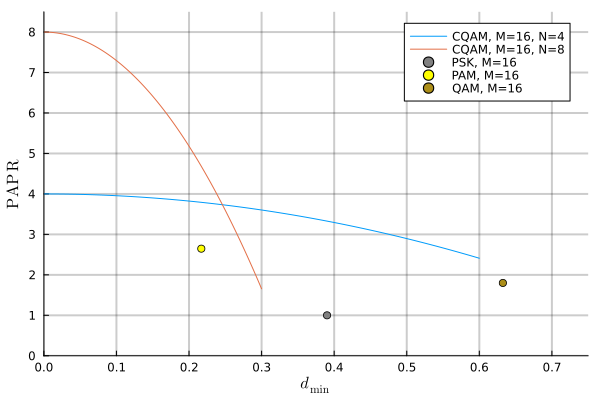

In [11]:
using Plots
using LaTeXStrings
gr()

minimum_distance_N4 = [dmin for dmin ∈ 0.001:0.001:0.6]
minimum_distance_N8 = [dmin for dmin ∈ 0.001:0.001:0.30]

M = 16
N4 = 4
N8 = 8

papr_N4 = [cqam_symbol_packets(dmin, M, N4)[end]^2 for dmin ∈ minimum_distance_N4]
papr_N8 = [cqam_symbol_packets(dmin, M, N8)[end]^2 for dmin ∈ minimum_distance_N8]

plot(minimum_distance_N4, papr_N4, label="CQAM, M=16, N=4", gridalpha=0.2, gridlinewidth=2)
plot!(minimum_distance_N8, papr_N8, label="CQAM, M=16, N=8")
# print(d_min_psk_16)
yticks!(0:1:ceil(maximum(papr_N8)))
xticks!(0:0.1:ceil(maximum(minimum_distance_N4)))
xlims!(0, 0.75)
ylims!(0, 8.5)
# ylims!(, ceil(maximum(papr_N4))/2)
scatter!([d_min_psk_16], [papr_psk_16], label="PSK, M=16", color=:gray)
scatter!([d_min_pam_16], [papr_pam_16], label="PAM, M=16", color=:yellow)
scatter!([d_min_qam_16], [papr_qam_16], label="QAM, M=16")
xlabel!(L"d_{\mathrm{min}}")
ylabel!(L"\mathrm{PAPR}")